# CM3151 Coursework

## Dataset (around 300 words)

For my coursework, I have chosen the classification dataset 'Seeds', sourced from the UCI Machine Learning Repository on 23rd October at 3:30pm. https://archive.ics.uci.edu/dataset/236/seeds.

The 'Seeds' dataset contains instances of individual seeds defined by the following 7 features: area, perimeter, compactness, length, width, asymmetry coefficient and length of kernel groove. These features were identified for each seed using soft X-ray photography. Each seed has a specific wheat variety: Kama, Rosa or Canadian.

The aim of this project is find the most effective classification model at identifying seed varieties. This will involve creating different classifiers and evaluating each model's accurary at predicting correct labels.


## Research Paper (around 300 words)

### Introduction
To support this project, I have chosen the following research paper: 

'Wheat Seed Classification: Utilizing Ensemble Machine Learning Approach' by Ajay Khatri, Shweta Agrawal and Jyotir M. Chatterjee.

This article was taken from the journal 'Scientific Programming', published by John Wiley and Sons Inc. This resource is a Q3-ranked journal. Although being quite a low ranking, it was one of the highest relevant papers available. It has a high number of citations, and was published within the last few years (2022). 

### Paper Content

The paper compares the use of the ensemble classification method with different machine learning models: K-nearest neighbours, decision tree and Gaussian NB classifiers. The ensemble method achieved the highest accuracy of the models, with 95%. 

This paper has conducted a very similar experiment using different machine learning classifiers on the same 'Seeds' dataset. As their model achieved 95% accuracy, this gives a expectation for the performance of the model trained in this project. 

### Application to this Project

As the research paper's ensemble model achieved the highest accuracy, I will first use a Random Forest ensemble classifier. 

## Data Pre-Processing

In [157]:
import numpy as np
import pandas as pd

#import txt file to a dataframe

seeds_df = pd.read_csv('data/seeds_dataset.txt')

#display dataframe

seeds_df.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


The file 'seeds_dataset.txt' does not have comma-separated values. Instead, each value is separated with a tab. 

The code below opens the file and replaces all tabs with commas.

In [158]:
import re

with open ('data/seeds_dataset.txt', 'r') as file:
    seed_data = file.read()

    #Replace tab with comma 
    seed_data = re.sub("\t",",", seed_data)

with open ('data/seeds_dataset.txt', 'w') as file:
    file.write(seed_data)


In [159]:
seeds_df = pd.read_csv('data/seeds_dataset.txt')

#View column names

seeds_df.columns

Index(['15.26', '14.84', '0.871', '5.763', '3.312', '2.221', '5.22', '1'], dtype='object')

The data file also does not include the feature names, so the data frame column names are mistakenly showing as the first row of values.

The following code reads the file again and adds in the column names with the `names` attribute. 

The column names were retrieved from the dataset description on the UCI Machine Learning Repository.


In [160]:
#Creates array of column names 
seeds_features = ['Area','Perimeter','Compactness','Length','Width','Asymmetry Coefficient','Groove Length', 'Target']

#The 'names' attribute adds the names in the array as the column headings
seeds_df = pd.read_csv('data/seeds_dataset.txt', names=seeds_features)

seeds_df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Groove Length,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Currently the target column values are integers. To make the dataset more readable for initial data exploration and understanding, the integers have been changed to the corresponding wheat variety: Kama (1), Rosa (2) and Canadian (3). 

The wheat varieties were identified from the research paper 'Wheat Seed Classification: Utilizing Ensemble Machine Learning Approach' by Ajay Khatri, Shweta Agrawal, Jyotir M. Chatterjee (2022).

In [161]:
# Change target categories from [1,2,3] to [0,1,2]

seeds_df.loc[:,'Target'] = seeds_df['Target'] -1


In [162]:
seeds_df.head(210)

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Groove Length,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [163]:
# All target values stored in a numpy array
targets = seeds_df.loc[:, 'Target']

targets = np.array(targets)

# Wheat variety names stored in a numpy array
target_names = ['Kama', 'Rosa', 'Canadian']

target_names = np.array(target_names)

# Replace original categorical variables with variety names

seeds_df['Variety'] = pd.Categorical.from_codes(targets, target_names)



In [164]:
seeds_df.head(210)

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Groove Length,Target,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,Kama
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,Canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,Canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,Canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,Canadian


In [165]:
#Remove original integer Target column 

seeds_df = seeds_df.drop('Target', axis=1)

seeds_df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Groove Length,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


## Data Exploration

Check the size of the dataset - the number of rows and columns

In [166]:
print('The dataset has', seeds_df.shape[0] , 'rows and', seeds_df.shape[1] ,'columns.')

The dataset has 210 rows and 8 columns.


Check the feature names

In [167]:
for i in range(len(seeds_df.columns)):
    print(seeds_df.columns[i])

Area
Perimeter
Compactness
Length
Width
Asymmetry Coefficient
Groove Length
Variety


### Missing Values

As the data has been pre-processed already, there are no missing values.

In [168]:
seeds_df.isnull().sum()

Area                     0
Perimeter                0
Compactness              0
Length                   0
Width                    0
Asymmetry Coefficient    0
Groove Length            0
Variety                  0
dtype: int64

### Class Distribution

In [169]:
seeds_df.value_counts('Variety')

Variety
Kama        70
Rosa        70
Canadian    70
Name: count, dtype: int64

In [170]:
classes = ['Kama', 'Rosa', 'Canadian']

for i in range(len(seeds_df['Variety'].unique())):
    print(f'Percentage of {classes[i]}: {round((seeds_df[seeds_df['Variety']==classes[i]].shape[0]) / seeds_df.shape[0] * 100,2)}%')

Percentage of Kama: 33.33%
Percentage of Rosa: 33.33%
Percentage of Canadian: 33.33%


Create a bar chart to visualise the class distribution:

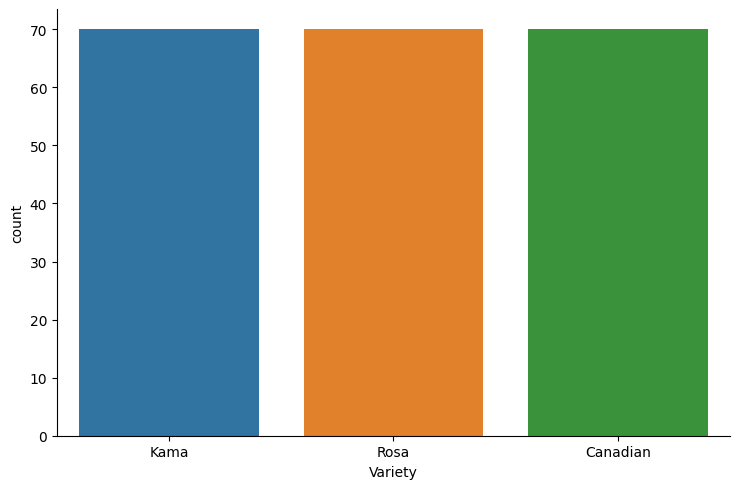

In [171]:
import seaborn as sns

#plot bar chart to show class distribution of the varieties

sns.catplot(x='Variety', hue='Variety', data=seeds_df, kind='count', height=5, aspect=1.5)

The dataset is well-balanced, with an even split of 70 instances per class. Each class represents 1/3 of the dataset.

These boxplots show the minimum, maximum and median values for each feature in the dataset, separated by wheat variety.

<Axes: xlabel='Variety', ylabel='Groove Length'>

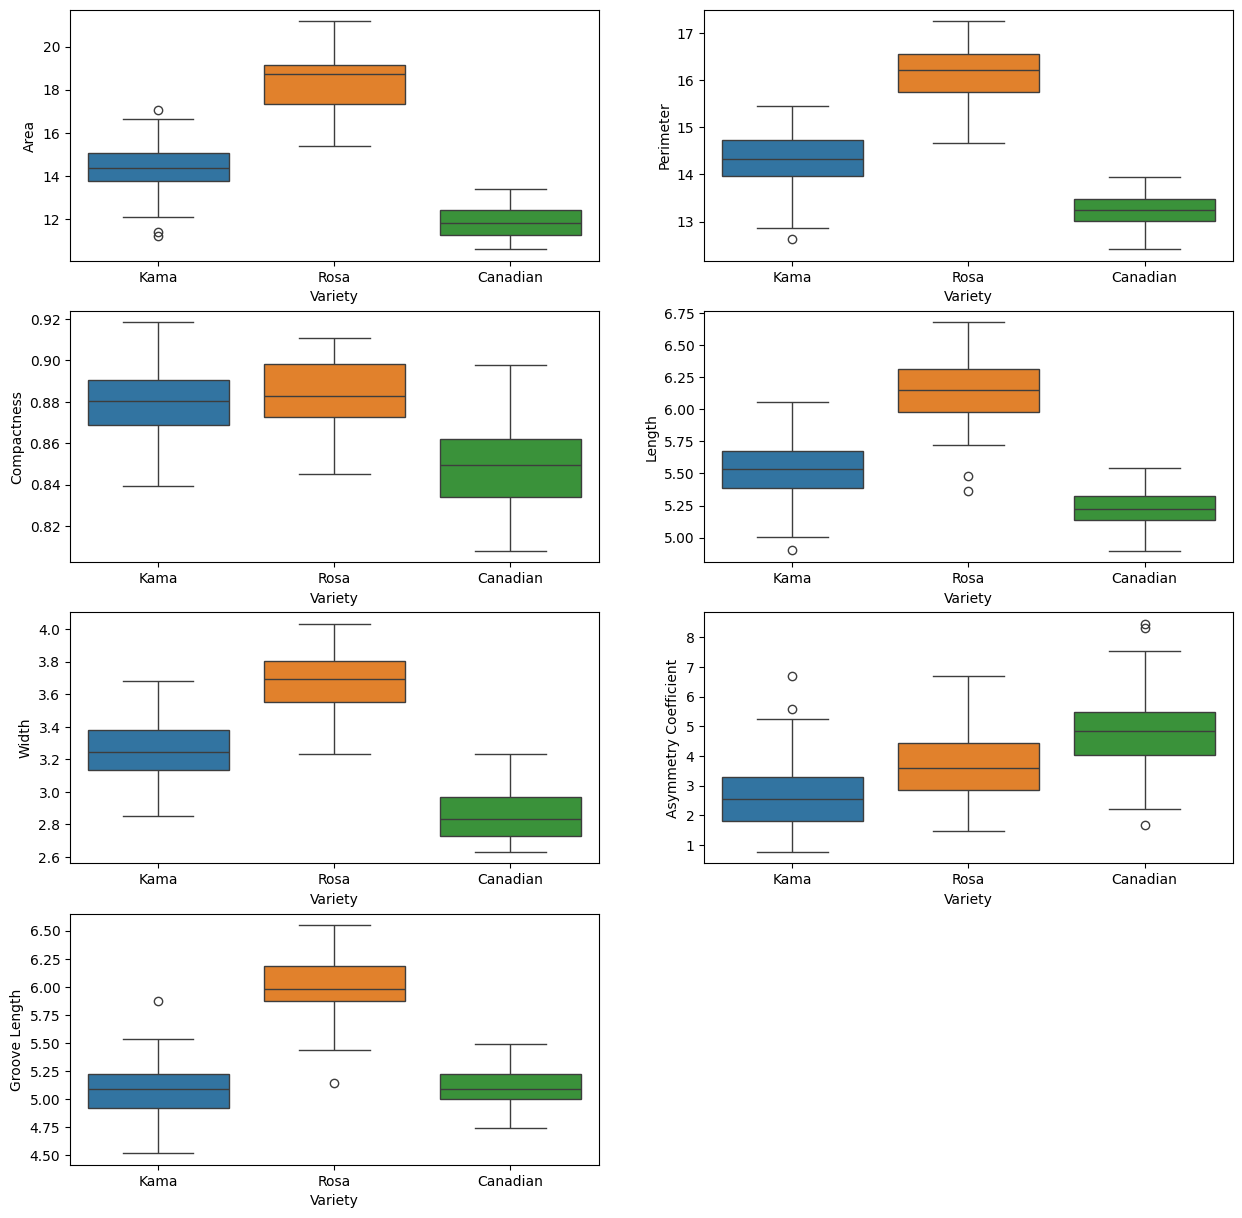

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.boxplot(x='Variety', y='Area', hue='Variety', data=seeds_df)

plt.subplot(4,2,2)
sns.boxplot(x='Variety', y='Perimeter', hue='Variety', data=seeds_df)

plt.subplot(4,2,3)
sns.boxplot(x='Variety', y='Compactness', hue='Variety', data=seeds_df)

plt.subplot(4,2,4)
sns.boxplot(x='Variety', y='Length', hue='Variety', data=seeds_df)

plt.subplot(4,2,5)
sns.boxplot(x='Variety', y='Width', hue='Variety', data=seeds_df)

plt.subplot(4,2,6)
sns.boxplot(x='Variety', y='Asymmetry Coefficient', hue='Variety', data=seeds_df)

plt.subplot(4,2,7)
sns.boxplot(x='Variety', y='Groove Length', hue='Variety', data=seeds_df)

### Correlations

To further understand the dataset, I have explored the relationships between the features with a correlation matrix. The closer to 1 the value is, the stronger the correlation between the features.

In [173]:
corr_mat = seeds_df.corr(numeric_only=True)

corr_mat.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry Coefficient,Groove Length
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131


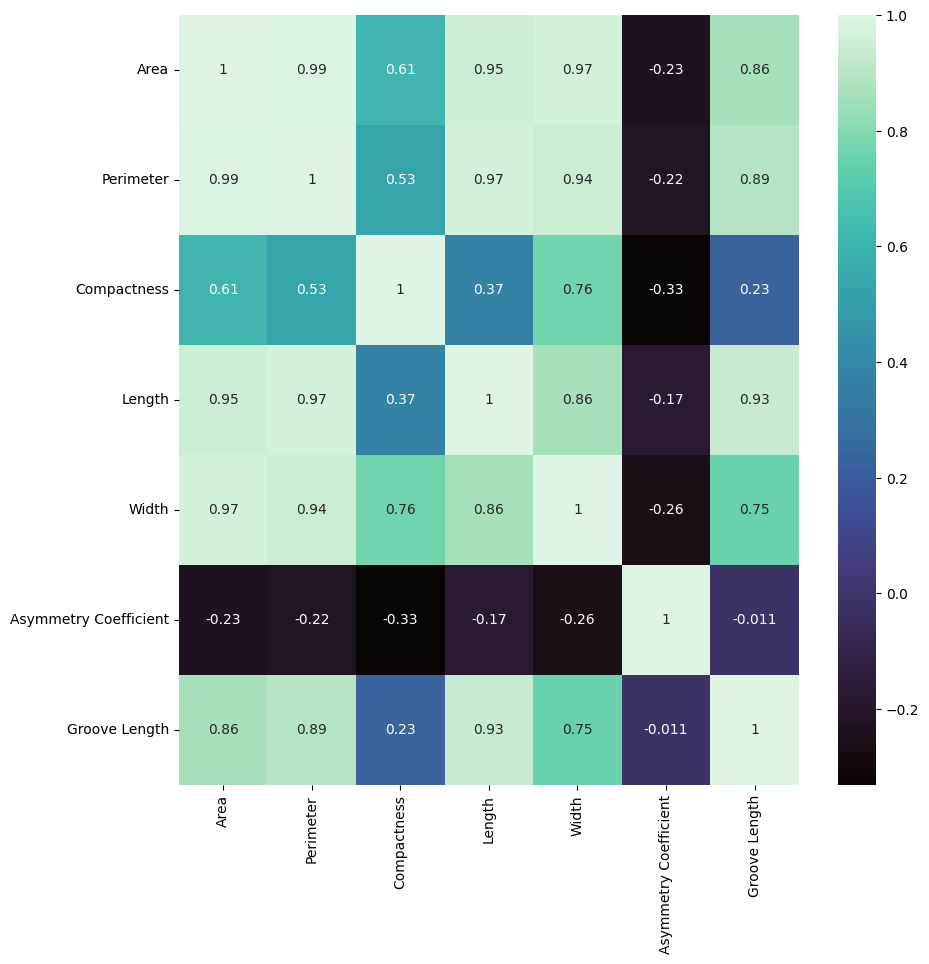

In [174]:
#create heatmap to visualise correlations

ax = plt.figure(figsize=(10,10))

ax = sns.heatmap(data=corr_mat, annot=True, cmap='mako')

To visualise these feature relationships, I created a series of scatter plot graphs. The closer the points are to a straight line, the more correlated the features are. 

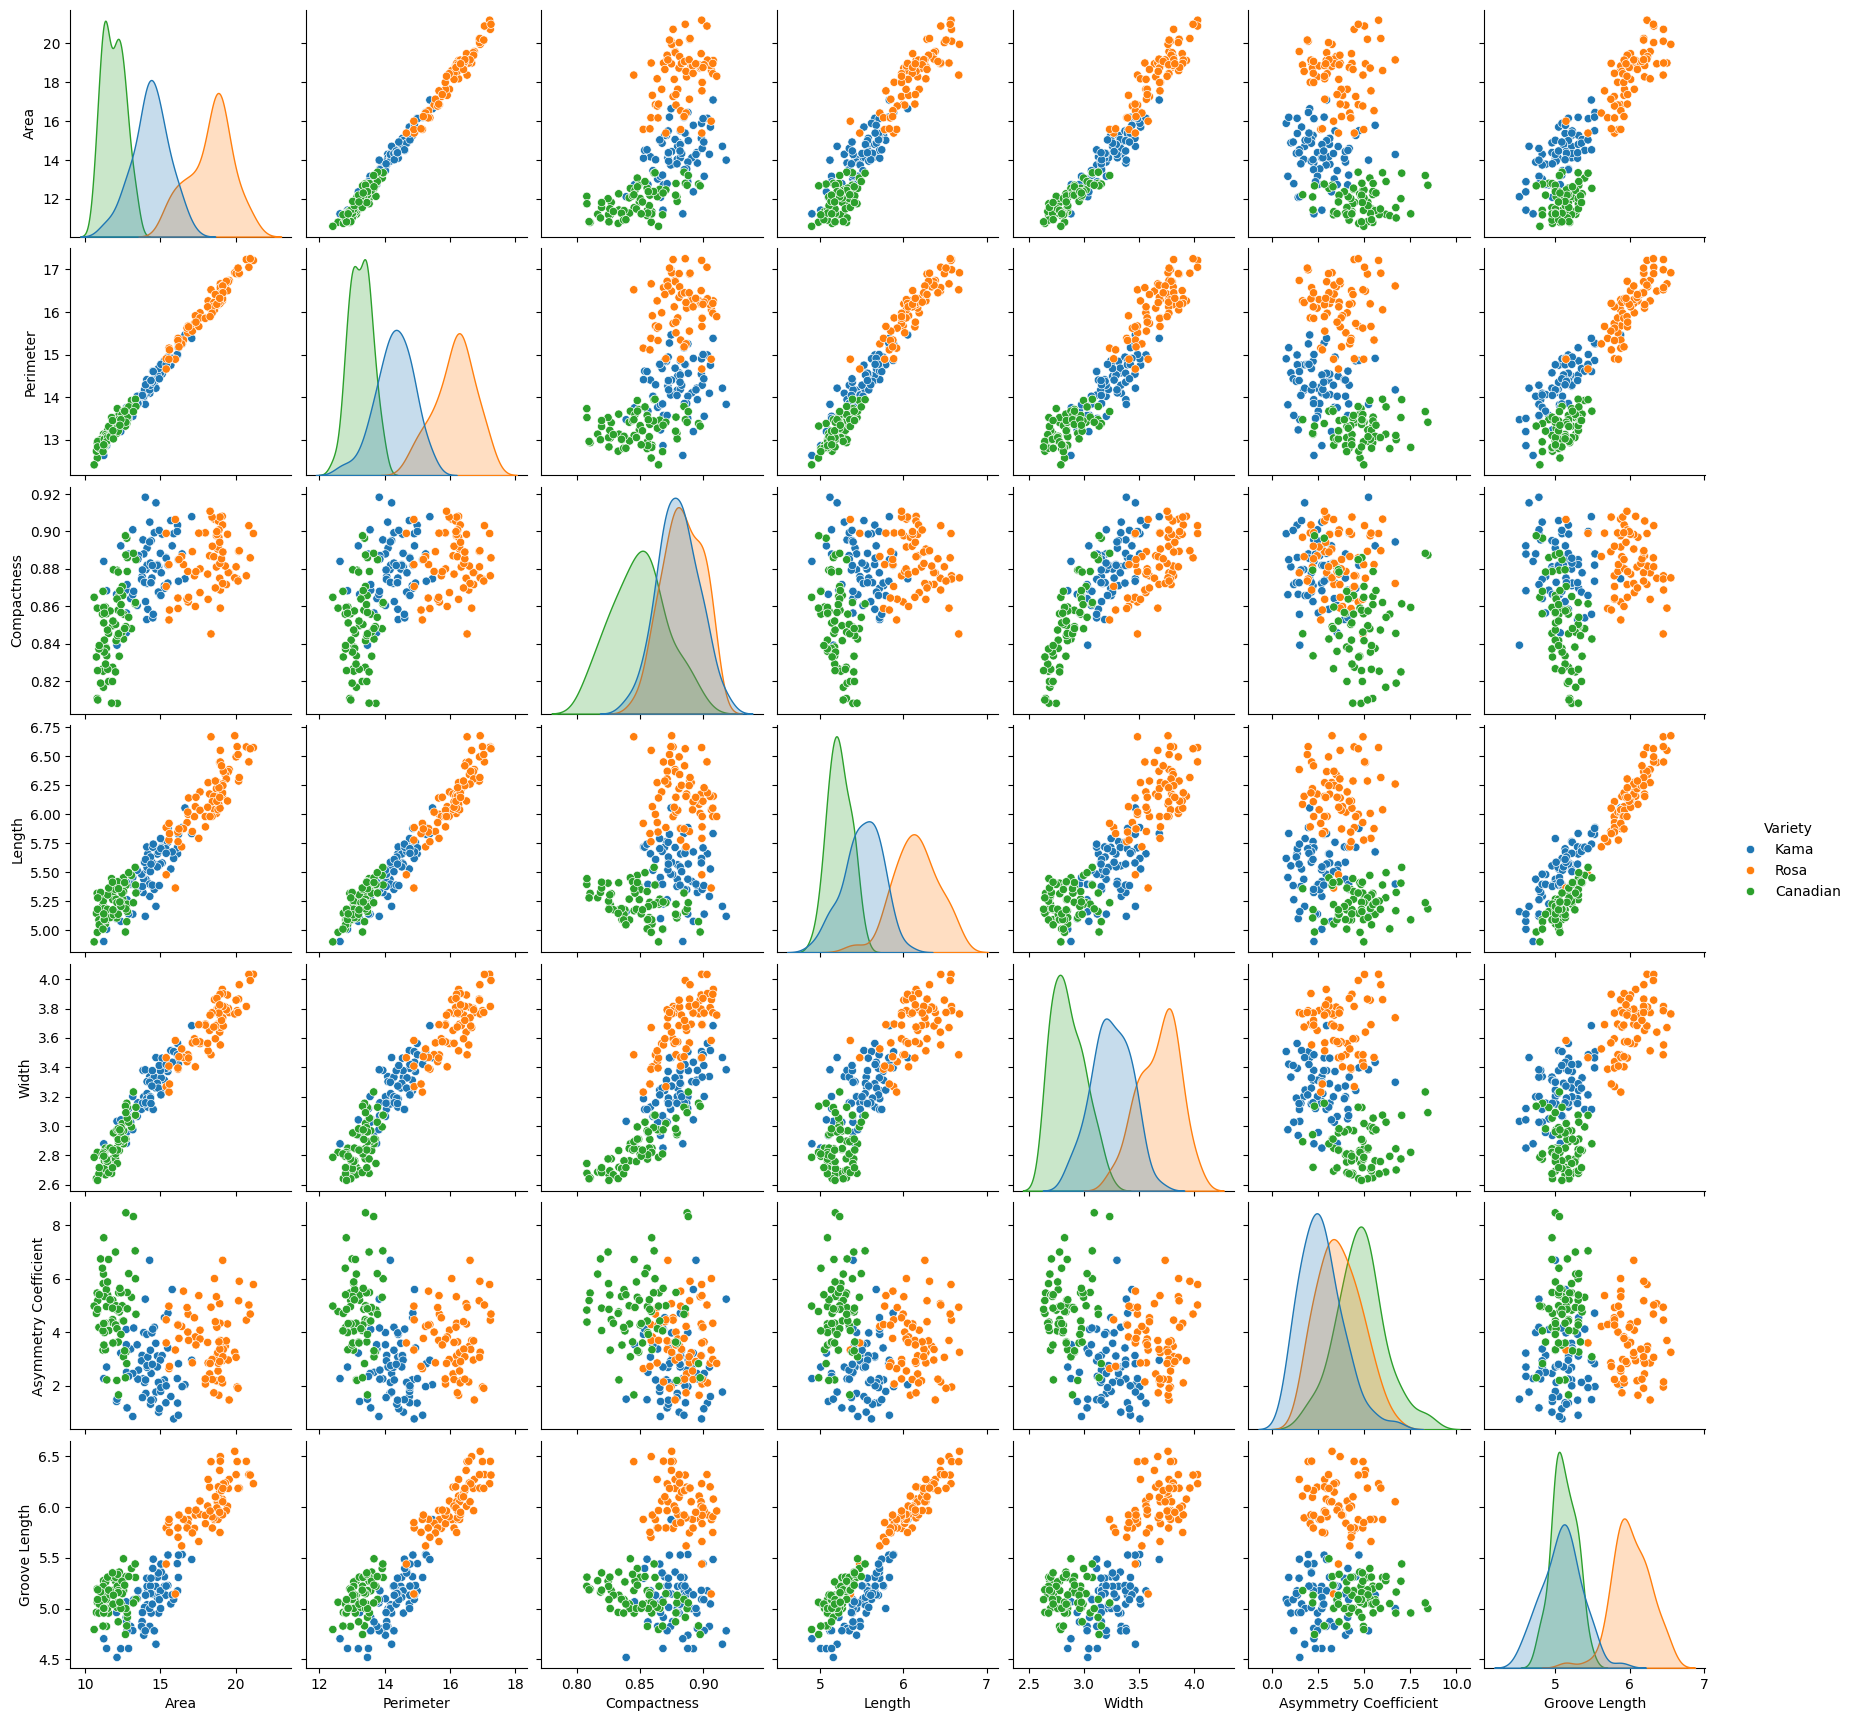

In [175]:
sns.pairplot(seeds_df, kind='scatter', hue='Variety')

From the correlation matrix and scatterplot graphs, it is clear that the features `area`, `perimeter`, `length` and  `width` are all quite highly correlated. The `asymmetry coefficient` has very little correlation to any other features in the dataset.

The features `Area` and `Perimeter` are especially highly correlated and very similar. These features are also more complicated to calculate in 2D imagery and are more labour-intensive, so I have decided to remove them from the dataset.

In [176]:
seeds_df.drop(['Area'], axis=1, inplace=True)
seeds_df.drop(['Perimeter'], axis=1, inplace=True)

seeds_df.describe()

,Compactness,Length,Width,Asymmetry Coefficient,Groove Length
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.870999,5.628533,3.258605,3.700201,5.408071
std,0.023629,0.443063,0.377714,1.503557,0.491480
min,0.808100,4.899000,2.630000,0.765100,4.519000
25%,0.856900,5.262250,2.944000,2.561500,5.045000
50%,0.873450,5.523500,3.237000,3.599000,5.223000
75%,0.887775,5.979750,3.561750,4.768750,5.877000
max,0.918300,6.675000,4.033000,8.456000,6.550000


## Create the Model - Random Forest

Encode class labels as integers:

In [177]:
from sklearn.preprocessing import LabelEncoder

#separate the class labels from other features in dataframe

X = seeds_df.iloc[:,:-1] 
y = seeds_df.iloc[:,-1]

y_labels = y

le = LabelEncoder()

le.fit(y_labels)

y_encoded = le.transform(y_labels)

Split the data into the training and testing sets. I have used the same split as the paper, which is 70% training and 30% testing.

In [178]:
from sklearn .model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=15)

In [179]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, random_state=15)

rf.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Experiment with number of trees in Random Forest classifier to get the best accuracy possible:

In [180]:
from sklearn.metrics import accuracy_score

n_estimator_values = list(range(1,100))

accuracy_list = []

for value in n_estimator_values:
    rf = RandomForestClassifier(n_estimators=n_estimator_values[value-1])
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)


n_estimator_accuracy = list(zip(n_estimator_values, accuracy_list))


Text(0, 0.5, 'Accuracy')

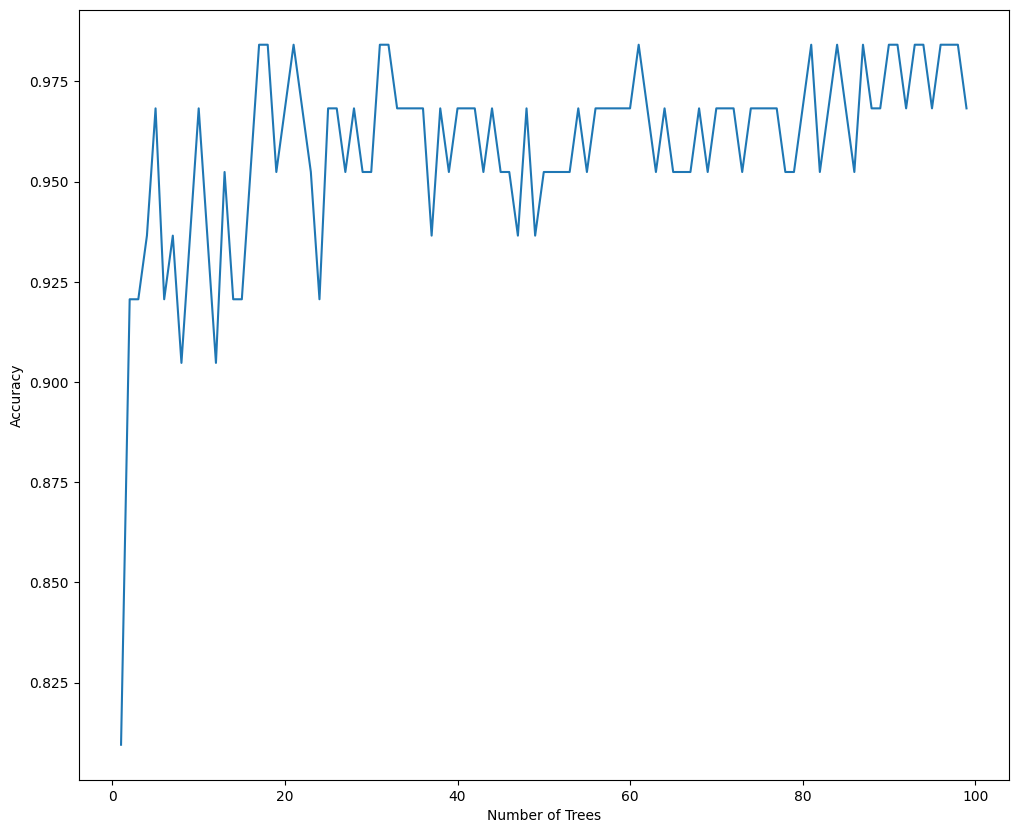

In [181]:
results = pd.DataFrame(data=n_estimator_accuracy, columns=['n_estimator_values','accuracy_list'])

plt.figure(figsize=(12,10))

ax = sns.lineplot(data=results, x='n_estimator_values', y='accuracy_list', markers='o')

ax.set_xlabel('Number of Trees')
ax.set_ylabel('Accuracy')

The line graph above shows there is a relationship between the number of trees and the model's accuracy. 

The accuracies are quite varied across all tree values. The Random Forest model first achieves its peak accuracy of about 98.5% with around 15 trees. Between around 25 and 70 trees, the values fluctuate in the range of about 93.5% to 98.5% accuracy. Then, at around 75 trees, the accuracy range narrows to between 95% and 98.5%. 

For the best results, I will create my Random Forest classifier with 100 trees. 

In [182]:
rf = RandomForestClassifier(n_estimators=100, random_state=15)

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [183]:
rf_predictions = rf.predict(X_test)

In [184]:
accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Model Accuracy: {np.round(accuracy * 100, 2)}%')

Random Forest Model Accuracy: 95.24%
